In [1]:
import chaospy as cp
import a_comparison as acn
import calculation_plot as calp
import sampling_method as sm
import numpy as np
%matplotlib inline

In [2]:
%%time
k = [10, 19]
#k = dimension
N = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
#N = sample of size
leng = len(N)
R = 50
#replicated R times
NN = int(leng*R)
#define variations of the test function

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs


In [3]:
%%time
kk = k[0]
#choose dimension
a1 = sm.create_coefficient_a(kk, "A1-1")
a2 = sm.create_coefficient_a(kk, "A1-2")
a3 = sm.create_coefficient_a(kk, "A2")
a4 = sm.create_coefficient_a(kk, "B")
a5 = sm.create_coefficient_a(kk)
#set up different test cases

CPU times: user 30 µs, sys: 7 µs, total: 37 µs
Wall time: 37 µs


In [4]:
%%time
a = a1
#choose test case
#chaospy Sobol
rule1 = "S"
#chaospy Latin Hypercube
rule2 = "L"
#Random
rule3 = "R"

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [5]:
%%time
er_si_N_1, er_sti_N_1 = calp.n_calculate(kk, N, a, R, rule1)
#calculate estimated S_i and S_ti for rule1

CPU times: user 12min 1s, sys: 11.1 s, total: 12min 12s
Wall time: 12min 4s


In [6]:
%%time
er_si_N_2, er_sti_N_2 = calp.n_calculate(kk, N, a, R, rule2)
#calculate estimated S_i and S_ti for rule2

CPU times: user 7min 28s, sys: 9.78 s, total: 7min 38s
Wall time: 7min 31s


In [7]:
%%time
er_si_N_3, er_sti_N_3 = calp.n_calculate(kk, N, a, R, rule3)
#calculate estimated S_i and S_ti for rule3

CPU times: user 7min 36s, sys: 11.2 s, total: 7min 48s
Wall time: 7min 39s


In [8]:
%%time
er_si_max_1 = er_si_N_1[(NN-R):NN, :]
er_sti_max_1 = er_sti_N_1[(NN-R):NN, :]
#get the S_i and S_ti of rule1 for max N 

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.06 µs


In [9]:
%%time
er_si_max_2 = er_si_N_2[(NN-R):NN, :]
er_sti_max_2 = er_sti_N_2[(NN-R):NN, :]
#get the S_i and S_ti of rule2 for max N 

CPU times: user 8 µs, sys: 4 µs, total: 12 µs
Wall time: 11 µs


In [10]:
%%time
er_si_max_3 = er_si_N_3[(NN-R):NN, :]
er_sti_max_3 = er_sti_N_3[(NN-R):NN, :]
#get the S_i and S_ti of rule3 for max N 

CPU times: user 8 µs, sys: 4 µs, total: 12 µs
Wall time: 11.9 µs


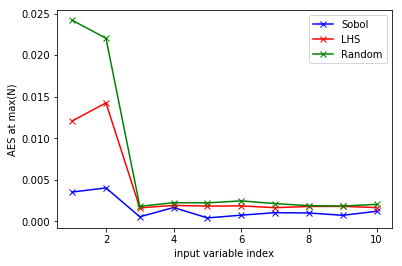

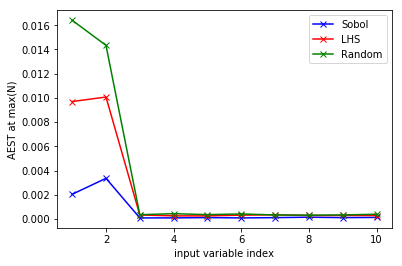

CPU times: user 294 ms, sys: 11 ms, total: 305 ms
Wall time: 303 ms


In [11]:
%%time
calp.draw_aes_plot(kk, a, R, er_si_max_1, er_si_max_2, er_si_max_3, er_sti_max_1, er_sti_max_2, er_sti_max_3)
#draw i-wise errors AES and AEST at max N

In [12]:
%%time
aes_1_N, aest_1_N = calp.aes_aest_N(N, kk, R, a, er_si_N_1, er_sti_N_1)
maes_1, maest_1 = calp.maes_maest_N(N, kk, aes_1_N, aest_1_N)
#calculate convergence MAES and MAEST for rule1

CPU times: user 6.81 ms, sys: 3.07 ms, total: 9.88 ms
Wall time: 7.52 ms


In [13]:
%%time
aes_2_N, aest_2_N = calp.aes_aest_N(N, kk, R, a, er_si_N_2, er_sti_N_2)
maes_2, maest_2 = calp.maes_maest_N(N, kk, aes_2_N, aest_2_N)
#calculate convergence MAES and MAEST for rule2

CPU times: user 6.36 ms, sys: 3.31 ms, total: 9.68 ms
Wall time: 7.14 ms


In [14]:
%%time
aes_3_N, aest_3_N = calp.aes_aest_N(N, kk, R, a, er_si_N_3, er_sti_N_3)
maes_3, maest_3 = calp.maes_maest_N(N, kk, aes_3_N, aest_3_N)
#calculate convergence MAES and MAEST for rule3

CPU times: user 6.85 ms, sys: 2.14 ms, total: 8.98 ms
Wall time: 7.1 ms


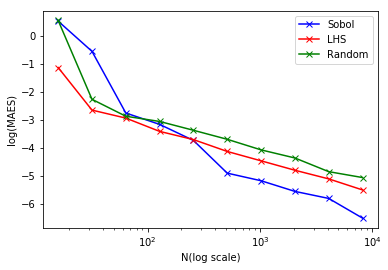

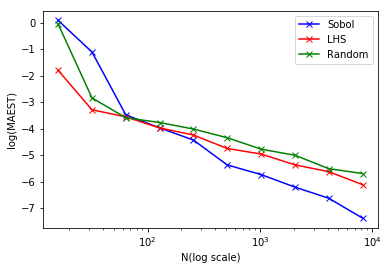

CPU times: user 696 ms, sys: 24.2 ms, total: 721 ms
Wall time: 717 ms


In [15]:
%%time
calp.draw_maes_plot(N, maes_1, maes_2, maes_3, maest_1, maest_2, maest_3)
#draw convergence log(MAES) and log(MAEST)